<a href="https://colab.research.google.com/github/odhiambow2354/House_Predictor/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Load the dataset
df = pd.read_csv('rent_apts.csv')

# Print the first 5 rows of the dataset
print(df.head())

                   Agency                             Neighborhood  \
0       Buy Rent Shelters              General Mathenge, Westlands   
1     Kenya Classic Homes                Kilimani, Dagoretti North   
2  Absolute Estate Agents  Hatheru Rd,, Lavington, Dagoretti North   
3   A1 Properties Limited                Kilimani, Dagoretti North   
4     Pmc Estates Limited                    Imara Daima, Embakasi   

         Price                                               link  sq_mtrs  \
0  KSh 155,000  /listings/4-bedroom-apartment-for-rent-general...      4.0   
1  KSh 100,000  /listings/3-bedroom-apartment-for-rent-kiliman...    300.0   
2   KSh 75,000  /listings/3-bedroom-apartment-for-rent-lavingt...      3.0   
3  KSh 135,000  /listings/3-bedroom-apartment-for-rent-kiliman...    227.0   
4   KSh 50,000  /listings/3-bedroom-apartment-for-rent-imara-d...      3.0   

   Bedrooms  Bathrooms  
0       4.0        4.0  
1       3.0        4.0  
2       3.0        5.0  
3       3.

In [89]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


In [91]:
df['Price'].str.replace('KSh','',regex=True).str.replace(',','')

0        155000
1        100000
2         75000
3        135000
4         50000
         ...   
1843     180000
1844     180000
1845     180000
1846     180000
1847     180000
Name: Price, Length: 1848, dtype: object

In [92]:
df['Price'] = df['Price'].str.replace('KSh','',regex=True).str.replace(',','').astype(float)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   float64
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(4), object(3)
memory usage: 101.2+ KB


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1848.0,97343.881494,40241.322051,12000.0,70000.0,95000.0,130000.0,280000.0
sq_mtrs,1846.0,327.226977,2048.784581,0.0,2.0,3.0,4.0,40470.0
Bedrooms,1845.0,2.577778,0.819399,0.0,2.0,3.0,3.0,6.0
Bathrooms,1557.0,2.595376,1.000349,1.0,2.0,2.0,3.0,6.0


<Axes: >

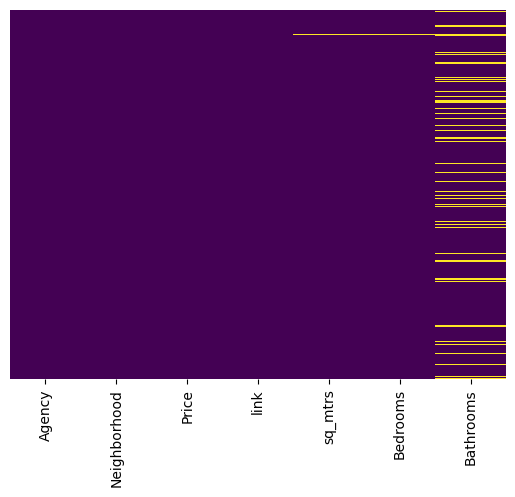

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
df.dropna(subset=['sq_mtrs','Bedrooms'],inplace=True)

In [97]:
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [98]:
df[df['Bathrooms'].isnull()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands",150000.0,/listings/furnished-2-bedroom-apartment-for-re...,2.0,2.0,NaN
8,Pmc Estates Limited,"Thika Road, Thika Road",85000.0,/listings/4-bedroom-apartment-for-rent-thika-r...,4.0,4.0,NaN
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,NaN
36,Cfs Homes,"Ruaka, Kiambaa",16000.0,/listings/1-bedroom-apartment-for-rent-ruaka-3...,1.0,1.0,NaN
...,...,...,...,...,...,...,...
1817,Capstone Properties,"General Mathenge, Westlands",175000.0,/listings/3-bedroom-apartment-for-rent-general...,3.0,3.0,NaN
1820,Cloud Real Estate,"General Mathenge, Westlands",175000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,NaN
1833,Rainbow Properties Limited,"State House, Dagoretti North",180000.0,/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,NaN
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000.0,/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,NaN


In [99]:
df.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

0       4.0
1       4.0
2       5.0
3       4.0
4       3.0
       ... 
1843    3.0
1844    2.0
1845    5.0
1846    4.0
1847    2.0
Name: Bathrooms, Length: 1845, dtype: float64

In [100]:
df['Bathrooms'] = df.groupby('Bedrooms')['Bathrooms'].transform(lambda x: x.fillna(round(x.mean())))

In [101]:
df.isnull().sum()

Agency          0
Neighborhood    0
Price           0
link            0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

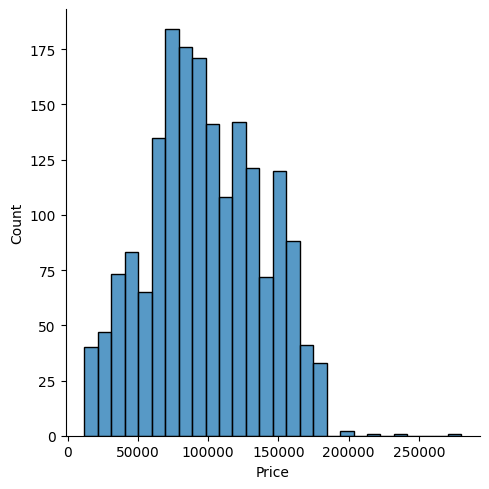

In [102]:
#Visualize the data
#Lets first check the distribution of the price column
sns.displot(df['Price'])

In [103]:
#we can see that the price column is right skewed
#lets check the houses that are outliers (200000 and above))
df[df['Price']>=200000]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
14,Yellow Market,"Riverside Drive, Riverside, Westlands",220000.0,/listings/3-bedroom-apartment-for-rent-riversi...,3.0,3.0,3.0
34,Origin Homes,"General Mathenge, Westlands",200000.0,/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,3.0
64,Sema Estate Agents,"Riverside, Westlands",280000.0,/listings/3-bedroom-apartment-for-rent-riversi...,3.0,3.0,3.0
94,Westside Real Estate,"Muringa Road, Kilimani, Dagoretti North",200000.0,/listings/5-bedroom-apartment-for-rent-kiliman...,240.0,5.0,5.0
158,Serene Valley Apartments,"Kiambere Road, Upper Hill, Langata",240000.0,/listings/furnished-3-bedroom-apartment-for-re...,3.0,3.0,2.0


<Axes: xlabel='sq_mtrs', ylabel='Price'>

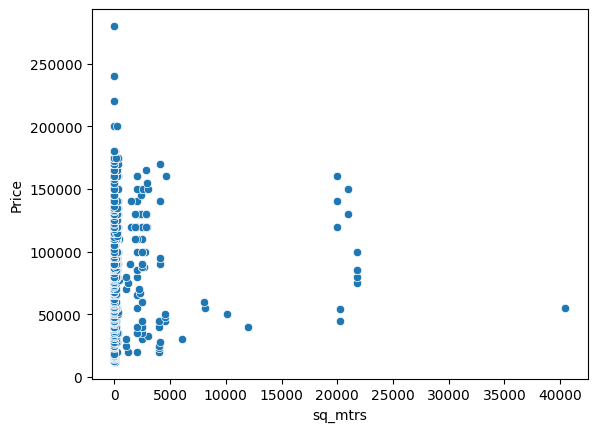

In [104]:
#Notice that the houses that are outliers are somehow in the same area
#sns scatterplot
sns.scatterplot(x='sq_mtrs',y='Price',data=df)

<Axes: xlabel='Bedrooms', ylabel='Price'>

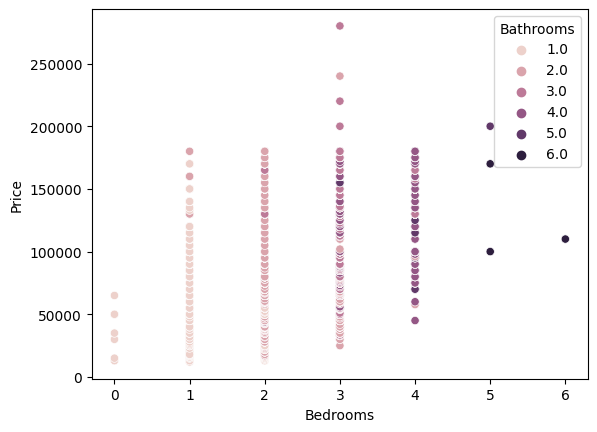

In [105]:
#scatterplot for price  and bedrooms colored by bathrooms
sns.scatterplot(x='Bedrooms',y='Price',data=df,hue='Bathrooms')

<Axes: xlabel='sq_mtrs', ylabel='Price'>

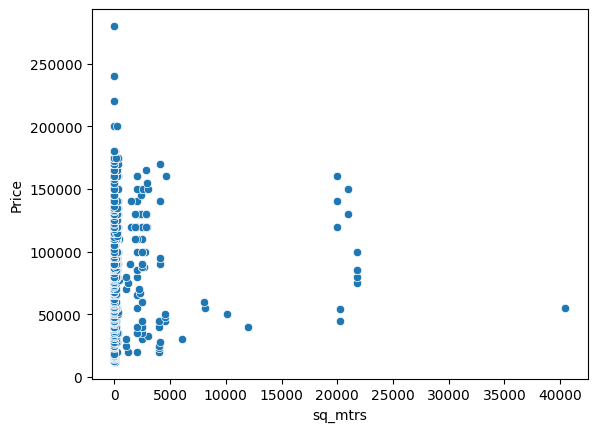

In [106]:
#we notice that the houses  are expensive when they have more bedrooms and bathrooms
#Lets check the scatterplot of the sq_mtrs column with price
sns.scatterplot(x='sq_mtrs',y='Price',data=df)

In [107]:
#check for houses with less than 100 sq_mtrs
df[df['sq_mtrs']<100]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,3.0
5,Lizmor Properties,"Waiyaki Way, Westlands",150000.0,/listings/furnished-2-bedroom-apartment-for-re...,2.0,2.0,2.0
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North",100000.0,/listings/2-bedroom-apartment-for-rent-kiliman...,14.0,2.0,3.0
...,...,...,...,...,...,...,...
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000.0,/listings/3-bedroom-apartment-for-rent-kileles...,3.0,3.0,3.0
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands",180000.0,/listings/2-bedroom-apartment-for-rent-spring-...,2.0,2.0,2.0
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North",180000.0,/listings/furnished-4-bedroom-apartment-for-re...,4.0,4.0,5.0
1846,Geoscape Global Limited,"Westlands Area, Westlands",180000.0,/listings/4-bedroom-apartment-for-rent-westlan...,4.0,4.0,4.0


In [108]:
#check for houses with less than 100 sq_mtrs
df[df['sq_mtrs']==0]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
16,Dunhill Consulting Limited,"Waiyaki Way, Westlands",50000.0,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,1.0
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands",13000.0,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,1.0
21,Homekenya24,"Ruaka, Kiambaa",13000.0,/listings/studio-apartment-for-rent-ruaka-3464104,0.0,0.0,1.0
26,Royani Properties Limited,"Kiambu Road, Kiambu Road",15000.0,/listings/studio-apartment-for-rent-3460554,0.0,0.0,1.0
100,Kaisa Ventures Kenya Limited,"Kileleshwa, Dagoretti North",30000.0,/listings/studio-apartment-for-rent-kileleshwa...,0.0,0.0,1.0
137,Ever Forgarden,"Denis Pritt, Kilimani, Dagoretti North",35000.0,/listings/studio-apartment-for-rent-kilimani-3...,0.0,0.0,1.0
275,Dunhill Consulting Limited,"Waiyaki Way, Westlands",50000.0,/listings/studio-apartment-for-rent-waiyaki-wa...,0.0,0.0,1.0
462,Rescom Ventures Ltd,"Nairobi West, Langata",65000.0,/listings/furnished-studio-apartment-for-rent-...,0.0,0.0,1.0


In [109]:
#we notice houses with 0 sq_mtrs, we shall drop them
df.drop(df[df['sq_mtrs']==0].index,inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1837 non-null   object 
 1   Neighborhood  1837 non-null   object 
 2   Price         1837 non-null   float64
 3   link          1837 non-null   object 
 4   sq_mtrs       1837 non-null   float64
 5   Bedrooms      1837 non-null   float64
 6   Bathrooms     1837 non-null   float64
dtypes: float64(4), object(3)
memory usage: 114.8+ KB


<Axes: xlabel='sq_mtrs', ylabel='Price'>

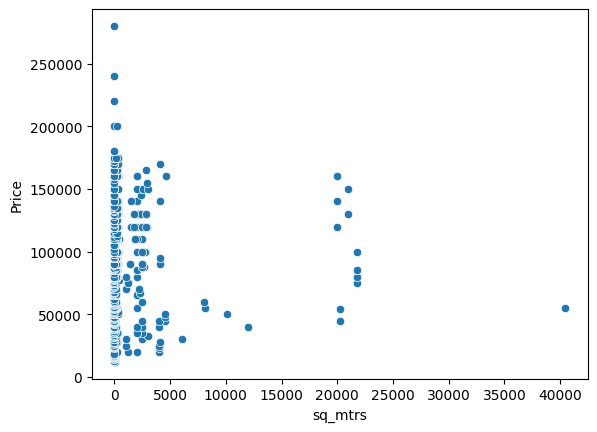

In [111]:
#Lets check the scatterplot of the sq_mtrs column with price
sns.scatterplot(x='sq_mtrs',y='Price',data=df)

<Axes: xlabel='sq_mtrs'>

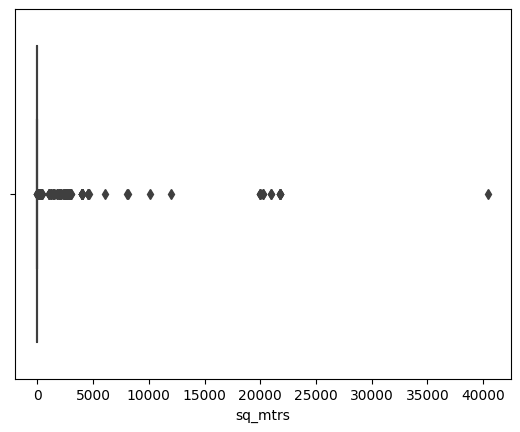

In [112]:
#wee see most are less than 5000 sq_mtrs
#box plot for sq_mtrs
sns.boxplot(x='sq_mtrs',data=df)

In [113]:
#we notice that there are outliers, we shall remove them
df.drop(df[df['sq_mtrs']>30000].index,inplace=True)

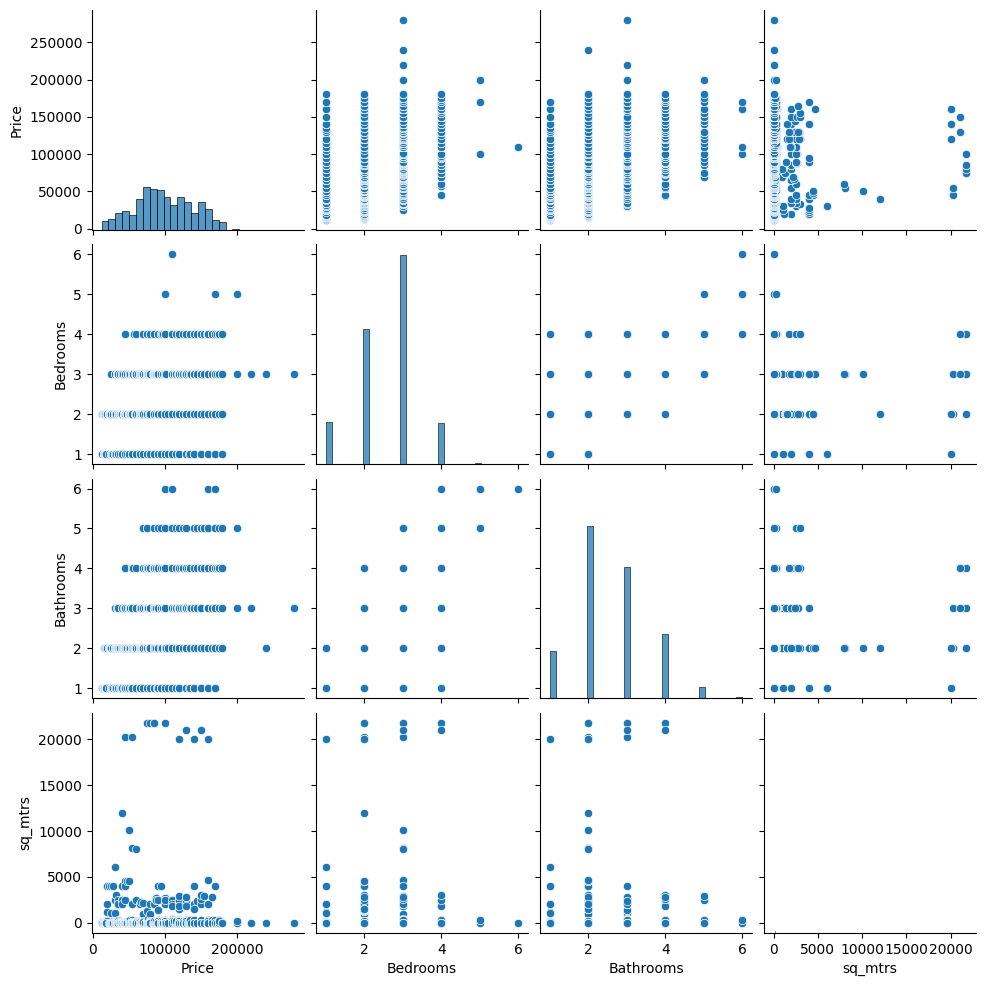

In [114]:
#generate a pairplot on price, bedrooms, bathrooms and sq_mtrs
sns.pairplot(df[['Price','Bedrooms','Bathrooms','sq_mtrs']])

In [115]:
#Conclusion
#The houses with more bedrooms and bathrooms are more expensive
#The houses with more sq_mtrs are more expensive

In [116]:
#Extract the town from neighborhood column
#for further analysis
df['Town'] = df['Neighborhood'].str.split(',').str[-1]

In [117]:
#check for the towns
df['Town'].nunique()

37

<Axes: xlabel='Town'>

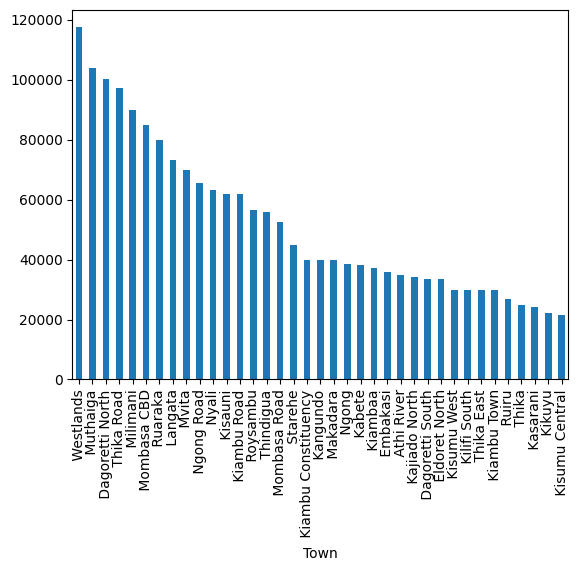

In [118]:
#grouby the towns and get the mean price,plot it
df.groupby('Town')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Town'>

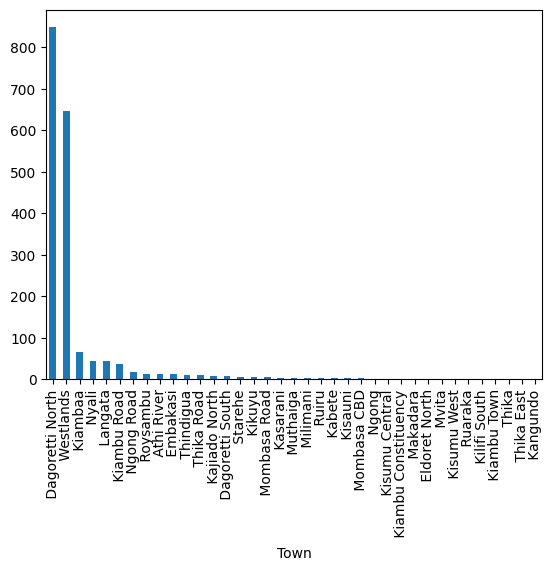

In [119]:
#we notice that the houses in Westlands are the most expensive
#lets also group the town and count the number of houses,\\
df.groupby('Town')['Price'].count().sort_values(ascending=False).plot(kind='bar')

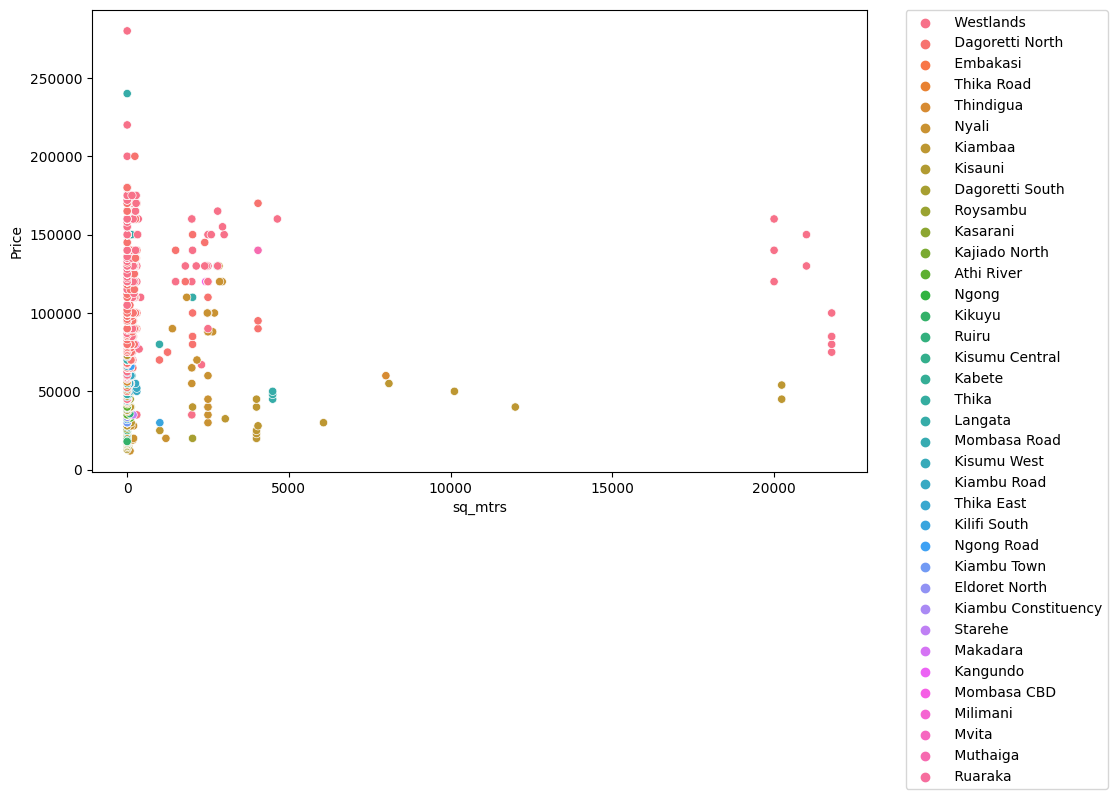

In [120]:
#most houses are in Dagoretti North and Westlands 
#while the least are in Kangundo

#plot a scatterplot of the price and sq_mtrs colored by the town
plt.figure(figsize=(10,6))

sns.scatterplot(x='sq_mtrs',y='Price',data=df,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='sq_mtrs', ylabel='Price'>

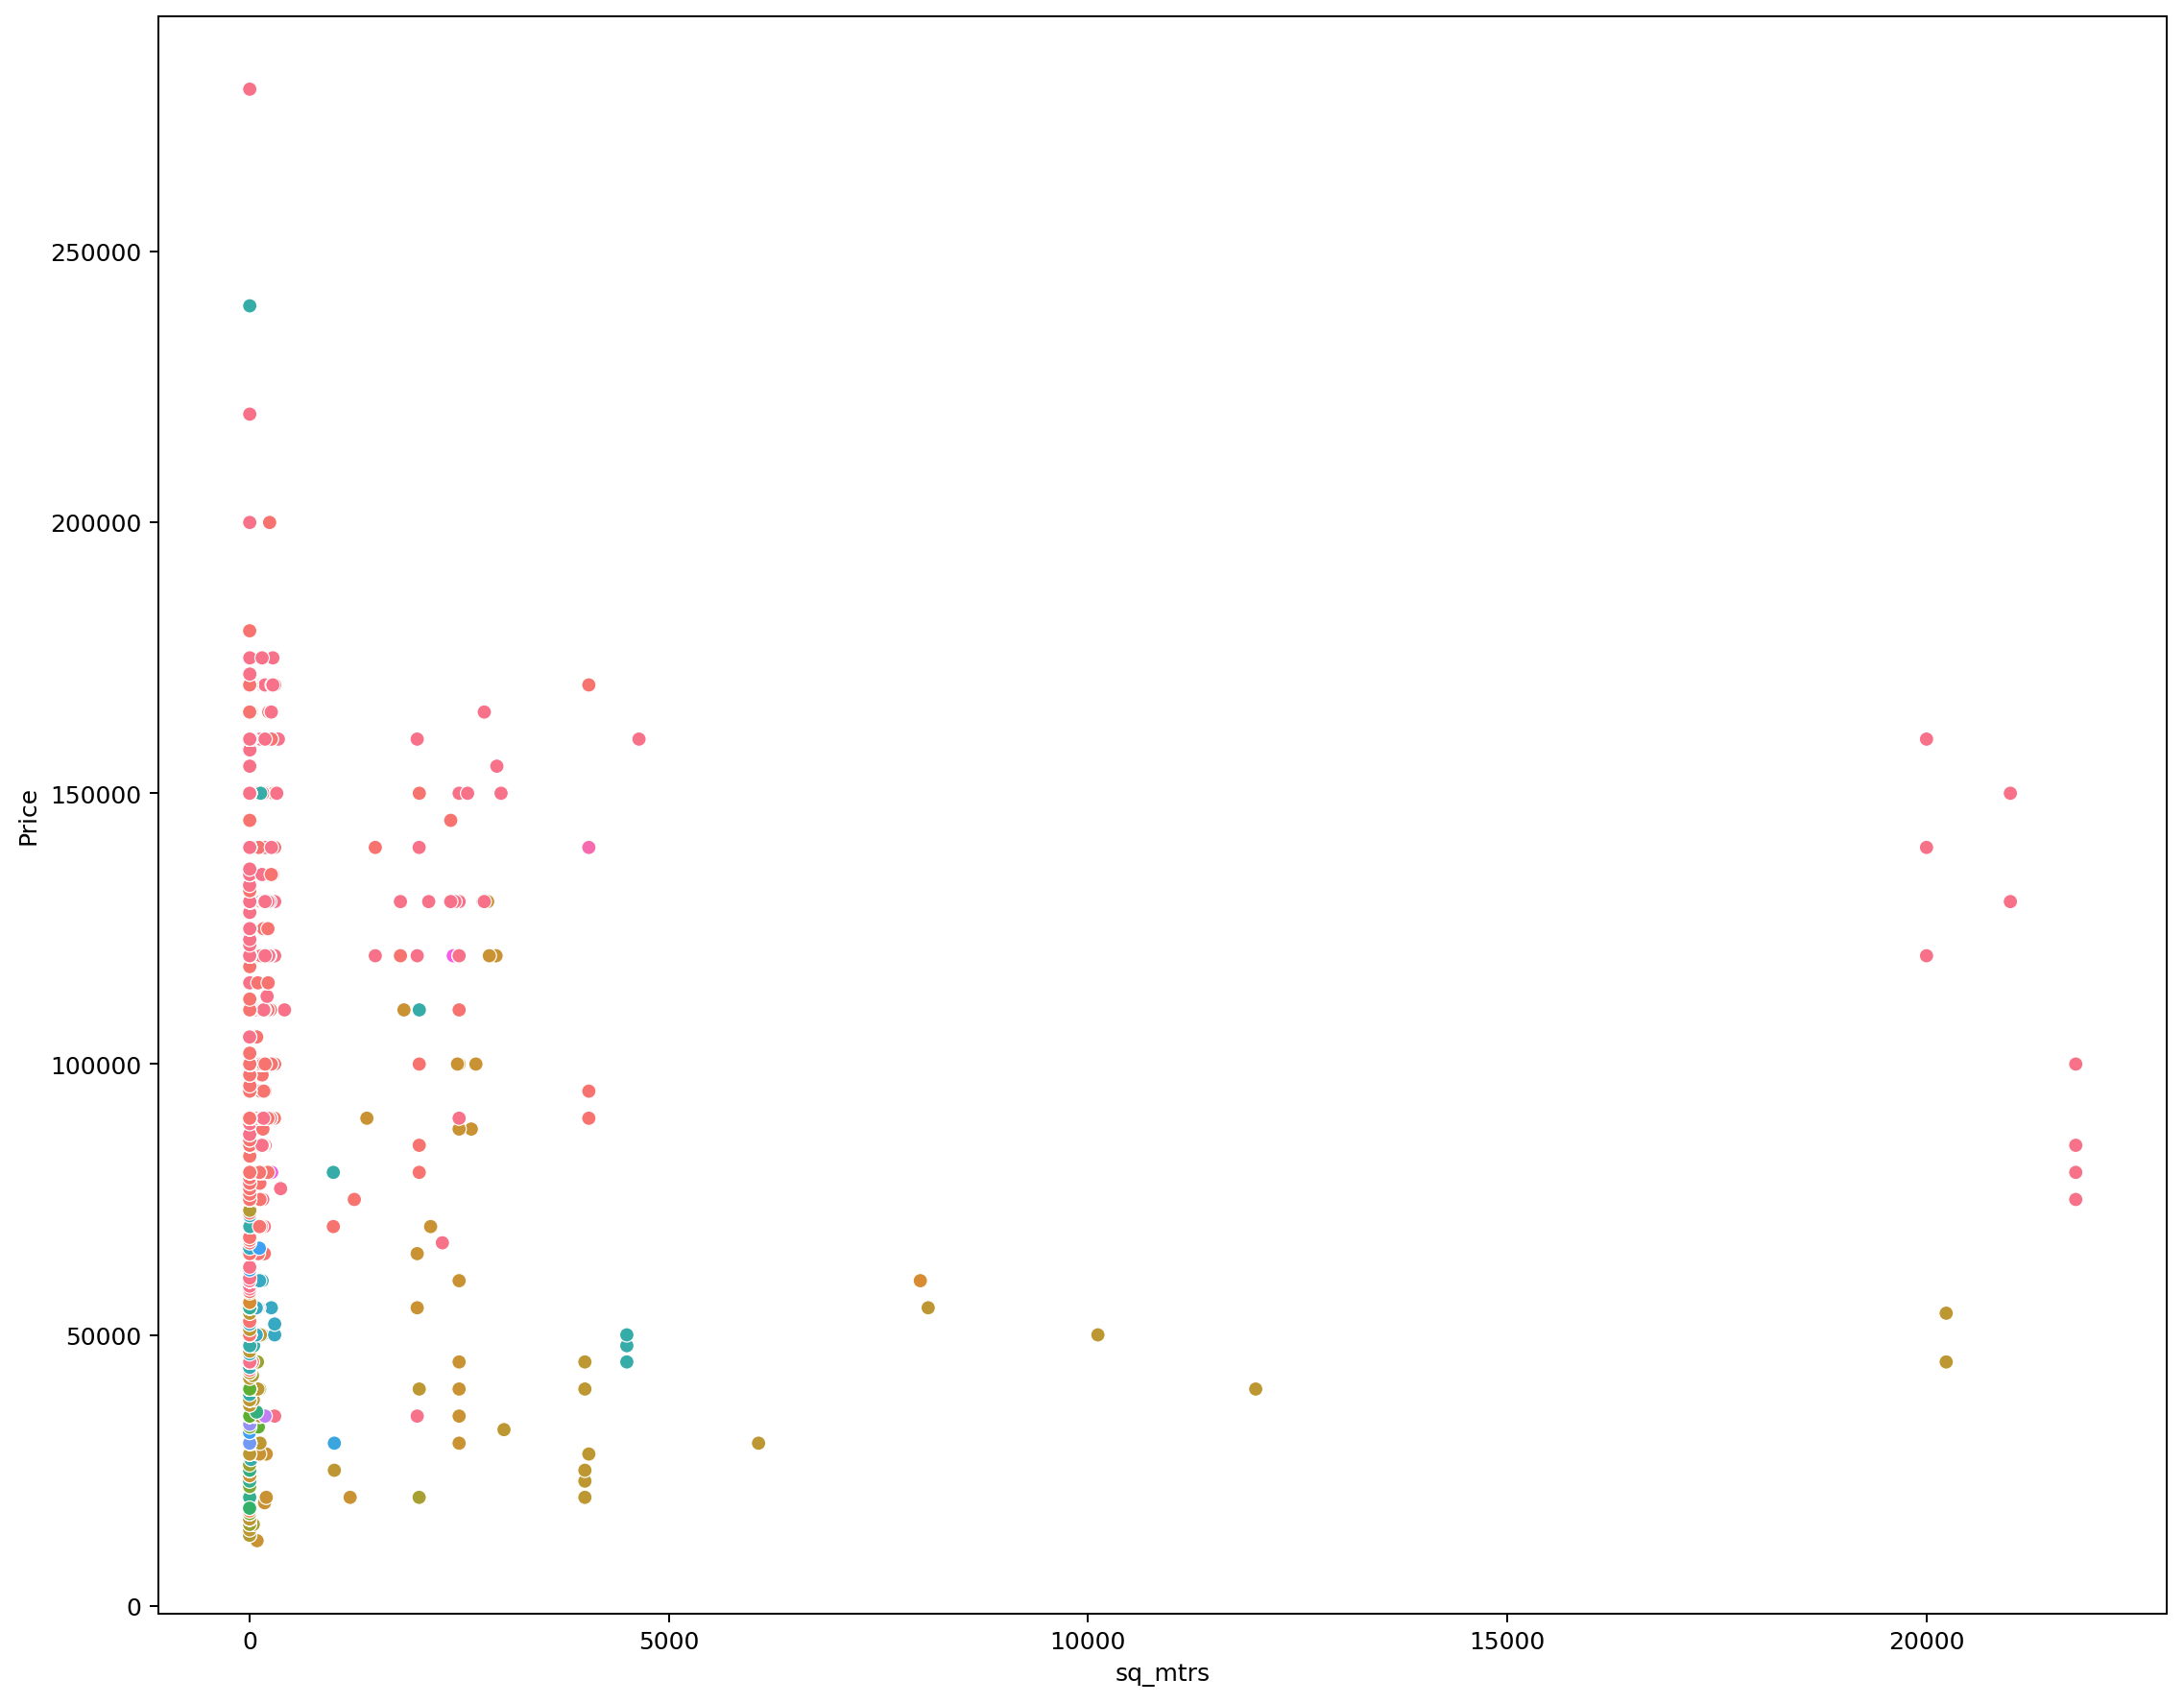

In [121]:
#Summary
plt.figure(figsize=(15,12),dpi=180)
#plot without the legend
sns.scatterplot(x='sq_mtrs',y='Price',data=df,hue='Town',legend=False)

In [122]:
#summary
#The houses in Westlands are the most expensive
#The houses in Dagoretti North and Westlands are the most numerous

#Lets check the houses with the most bedrooms
df[df['Bedrooms']==df['Bedrooms'].max()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms,Town
1164,Ring Kenya Ltd,"Ngong Road, Ngong Road",110000.0,/listings/6-bedroom-apartment-for-rent-3465186,6.0,6.0,6.0,Ngong Road


In [ ]:
#lets check the houses with the most bathrooms
df[df['Bathrooms']==df['Bathrooms'].max()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms,Town
1004,Regent Management Ltd,"Gitanga/Amboseli Road, Lavington, Dagoretti North",100000.0,/listings/5-bedroom-apartment-for-rent-lavingt...,5.0,5.0,6.0,Dagoretti North
1164,Ring Kenya Ltd,"Ngong Road, Ngong Road",110000.0,/listings/6-bedroom-apartment-for-rent-3465186,6.0,6.0,6.0,Ngong Road
1738,Ensuite Realtors,"Othaya Road, Kileleshwa, Dagoretti North",160000.0,/listings/4-bedroom-apartment-for-rent-kileles...,4.0,4.0,6.0,Dagoretti North
1803,Kenya Classic Homes,"Kilimani, Dagoretti North",170000.0,/listings/5-bedroom-apartment-for-rent-kiliman...,300.0,5.0,6.0,Dagoretti North


In [123]:
#Lets check the houses with the most sq_mtrs
df[df['sq_mtrs']==df['sq_mtrs'].max()]

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms,Town
567,Wealthlink Realtors Ltd,"Westlands Area, Westlands",75000.0,/listings/2-bedroom-apartment-for-rent-westlan...,21780.0,2.0,2.0,Westlands
706,Wealthlink Realtors Ltd,"Westlands Area, Westlands",80000.0,/listings/2-bedroom-apartment-for-rent-westlan...,21780.0,2.0,2.0,Westlands
761,Wealthlink Realtors Ltd,"Westlands Area, Westlands",85000.0,/listings/4-bedroom-apartment-for-rent-westlan...,21780.0,4.0,4.0,Westlands
784,Wealthlink Realtors Ltd,"Westlands Area, Westlands",85000.0,/listings/3-bedroom-apartment-for-rent-westlan...,21780.0,3.0,3.0,Westlands
1014,Wealthlink Realtors Ltd,"Rhapta Road, Westlands",100000.0,/listings/3-bedroom-apartment-for-rent-rhapta-...,21780.0,3.0,3.0,Westlands


In [124]:
# Assuming that the DataFrame is named 'df' and the 'Town' column contains the town names
unique_towns = df['Town'].unique()  # Get an array of unique town names
town_index = range(len(unique_towns))  # Generate a range of integers for town indices

# Create a dictionary mapping town names to indices
town_index_dict = dict(zip(unique_towns, town_index))

# Create a new column 'town_index' in the DataFrame by mapping the 'Town' column using the index dictionary
df['Town_index'] = df['Town'].map(town_index_dict)

# Print the updated DataFrame

df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms,Town,Town_index
0,Buy Rent Shelters,"General Mathenge, Westlands",155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0,Westlands,0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0,Dagoretti North,1
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0,Dagoretti North,1
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0,Dagoretti North,1
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000.0,/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,3.0,Embakasi,2


In [125]:
print(df['Town_index'])

0       0
1       1
2       1
3       1
4       2
       ..
1843    1
1844    0
1845    1
1846    0
1847    1
Name: Town_index, Length: 1836, dtype: int64


In [126]:
# Load the dataset


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the features and target variable
X = df[['sq_mtrs', 'Bedrooms', 'Bathrooms', 'Town_index']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lr = LinearRegression()

# Train the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model performance using RMSE and R2 score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 32697.086050113223
R2 Score: 0.3218690965724599


In [127]:

# Define a function to predict housing prices
def predict_price(sq_mtrs, bedrooms, bathrooms, town):
    town_index = town_index_dict.get(town, 0)  # Get the index of the town from the town_index_dict
    features = [[sq_mtrs, bedrooms, bathrooms, town_index]]
    price = lr.predict(features)[0]  # Use the trained linear regression model to predict the price
    return f"KSh {price:,.2f}"
unique_towns = unique_towns.tolist()
# Create the Gradio interface
inputs = [gr.inputs.Number(label='Square Meters'), 
          gr.inputs.Number(label='Bedrooms'), 
          gr.inputs.Number(label='Bathrooms'),
          gr.inputs.Dropdown(choices=unique_towns)
          ]
output = gr.outputs.Label(label='Price')

gr.Interface(fn=predict_price, inputs=inputs, outputs=output, 
             title='Housing Price Predictor',
             description='Enter the features you prefer and get a prediction').launch()

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(valu

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>